# Mini Projet 2 : Classification

## 1.Importation des bibliothèques

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 2.Importation de la base de donnée

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')

### Affichage des cinq premières lignes

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 3.Affichage de la dimension

In [4]:
dataset.shape

(10000, 14)

## 4.Supprision des colonnes ‘RowNumber’, ‘CustomerID’ & ‘Surname’

In [5]:
dataset =dataset.drop(['RowNumber','CustomerId','Surname'],axis = 1)

In [6]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 5.Affichage des descriptions statistiques et des boxplot des variables numériques

In [7]:
dataset.describe()  #description statique

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Autre informations 

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [9]:
dataset.isnull().sum()   #donc ici on n'a aucune valeur manquante

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Les Boxplots 

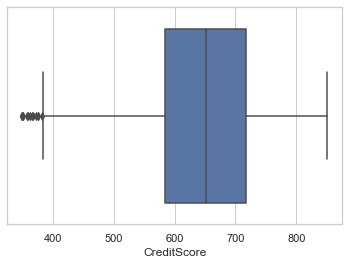

In [10]:
sns.set(style = 'whitegrid')
ax = sns.boxplot(dataset['CreditScore'],orient = 'h')

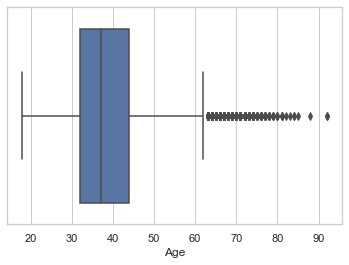

In [11]:
ax = sns.boxplot(dataset['Age'],orient = 'h')

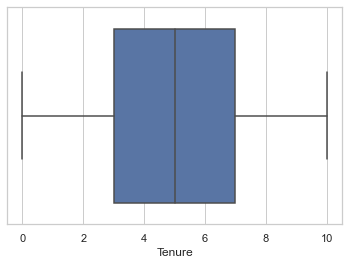

In [12]:
ax = sns.boxplot(dataset['Tenure'],orient = 'h')

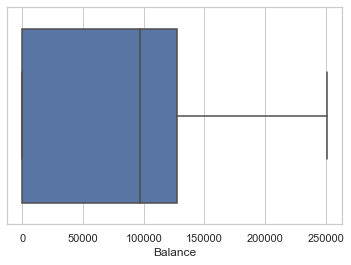

In [13]:
ax = sns.boxplot(dataset['Balance'],orient = 'h')

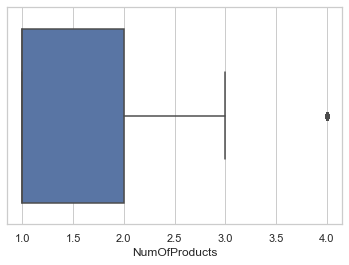

In [14]:
ax = sns.boxplot(dataset['NumOfProducts'],orient = 'h')

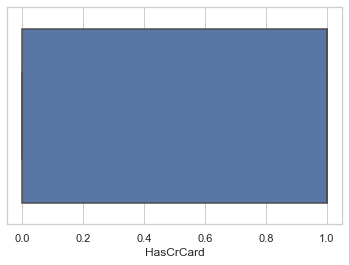

In [15]:
ax = sns.boxplot(dataset['HasCrCard'],orient = 'h')

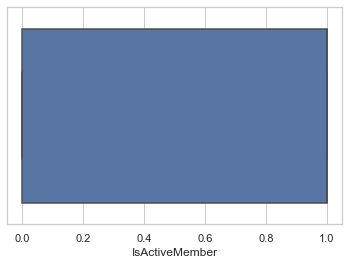

In [16]:
ax = sns.boxplot(dataset['IsActiveMember'],orient = 'h')

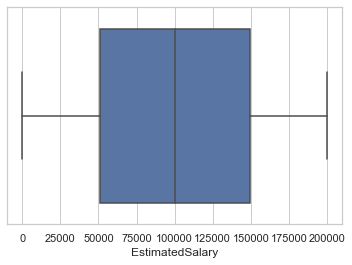

In [17]:
ax = sns.boxplot(dataset['EstimatedSalary'],orient = 'h')

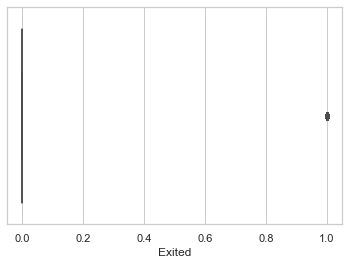

In [18]:
ax = sns.boxplot(dataset['Exited'],orient = 'h')

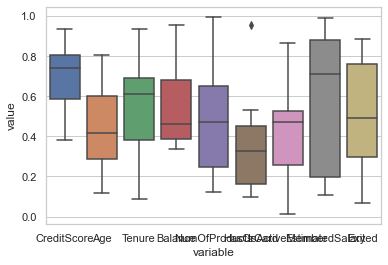

In [19]:
df = pd.DataFrame(data = np.random.random(size=(9,9)), columns = ['CreditScore','Age','Tenure','Balance','NumOfProducts',
                                                                 'HasCrCard','IsActiveMember','EstimatedSalary','Exited'])

sns.boxplot(x="variable", y="value", data=pd.melt(df))

plt.show()

### Correlation

In [20]:
correlations = dataset.corr()

<AxesSubplot:>

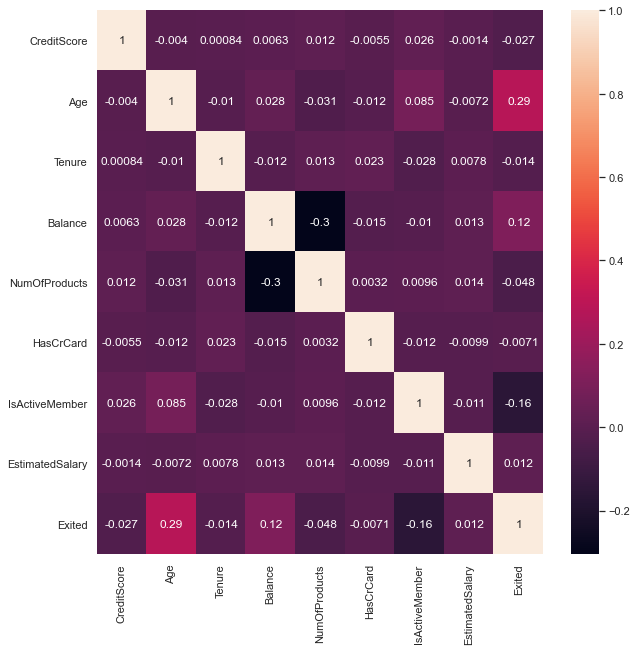

In [21]:
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlations, annot=True)

## 6.Calcul de la moyenne de chaque variable

In [22]:
dataset.groupby(['HasCrCard']).mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
HasCrCard,,,,,,,,
0,651.345331,39.112054,4.911715,77920.787552,1.527334,0.524278,100974.397711,0.208149
1,650.187952,38.842381,5.054996,75886.913330,1.531396,0.511269,99721.161949,0.201843


In [23]:
dataset.groupby(['IsActiveMember']).mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,Exited
IsActiveMember,,,,,,,,
0,647.973603,37.997938,5.097340,77134.376863,1.524438,0.711074,100767.203854,0.268509
1,652.934188,39.791497,4.933217,75875.422145,1.535624,0.700252,99452.965894,0.142691


In [24]:
dataset.groupby(['Exited']).mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,
0,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


## 7.affichage des variables numériques deux à deux (l’une en fonction de l’autre)

Text(0.5, 1.0, 'CreditScore vs Age')

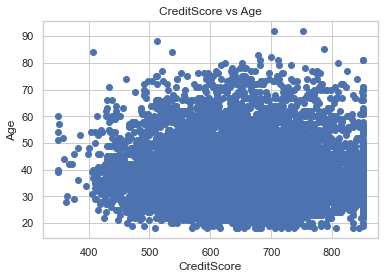

In [27]:
plt.scatter(x = dataset['CreditScore'], y = dataset['Age'])
plt.xlabel('CreditScore')
plt.ylabel('Age')
plt.title('CreditScore vs Age')

Text(0.5, 1.0, 'CreditScore vs Tenure')

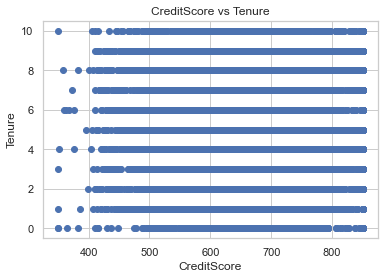

In [28]:
plt.scatter(x = dataset['CreditScore'], y = dataset['Tenure'])
plt.xlabel('CreditScore')
plt.ylabel('Tenure')
plt.title('CreditScore vs Tenure')

Text(0.5, 1.0, 'CreditScore vs Balance')

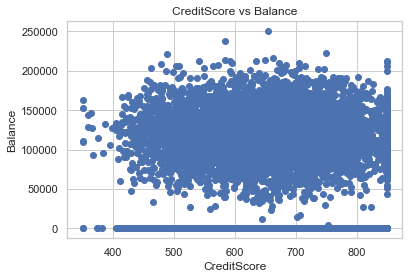

In [29]:
plt.scatter(x = dataset['CreditScore'], y = dataset['Balance'])
plt.xlabel('CreditScore')
plt.ylabel('Balance')
plt.title('CreditScore vs Balance')

Text(0.5, 1.0, 'CreditScore vs NumOfProducts')

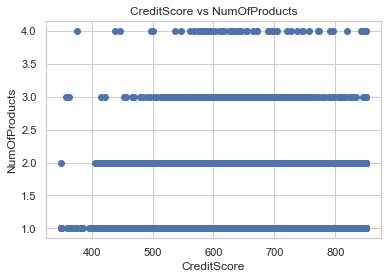

In [30]:
plt.scatter(x = dataset['CreditScore'], y = dataset['NumOfProducts'])
plt.xlabel('CreditScore')
plt.ylabel('NumOfProducts')
plt.title('CreditScore vs NumOfProducts')

Text(0.5, 1.0, 'CreditScore vs HasCrCard')

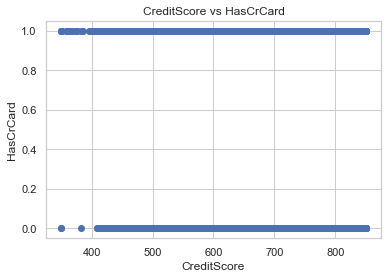

In [31]:
plt.scatter(x = dataset['CreditScore'], y = dataset['HasCrCard'])
plt.xlabel('CreditScore')
plt.ylabel('HasCrCard')
plt.title('CreditScore vs HasCrCard')

Text(0.5, 1.0, 'CreditScore vs IsActiveMember')

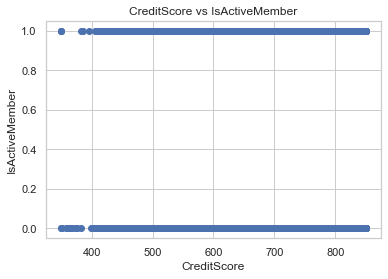

In [32]:
plt.scatter(x = dataset['CreditScore'], y = dataset['IsActiveMember'])
plt.xlabel('CreditScore')
plt.ylabel('IsActiveMember')
plt.title('CreditScore vs IsActiveMember')

Text(0.5, 1.0, 'CreditScore vs EstimatedSalary')

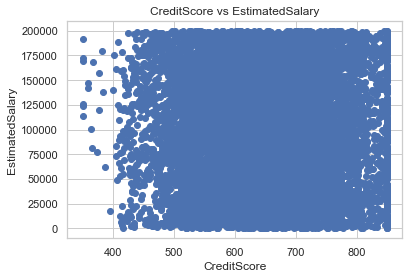

In [33]:
plt.scatter(x = dataset['CreditScore'], y = dataset['EstimatedSalary'])
plt.xlabel('CreditScore')
plt.ylabel('EstimatedSalary')
plt.title('CreditScore vs EstimatedSalary')

Text(0.5, 1.0, 'CreditScore vs Exited')

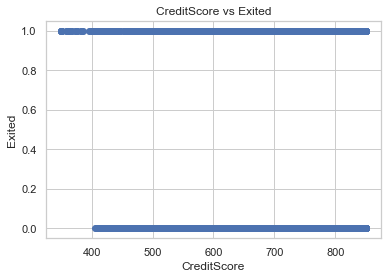

In [34]:
plt.scatter(x = dataset['CreditScore'], y = dataset['Exited'])
plt.xlabel('CreditScore')
plt.ylabel('Exited')
plt.title('CreditScore vs Exited')

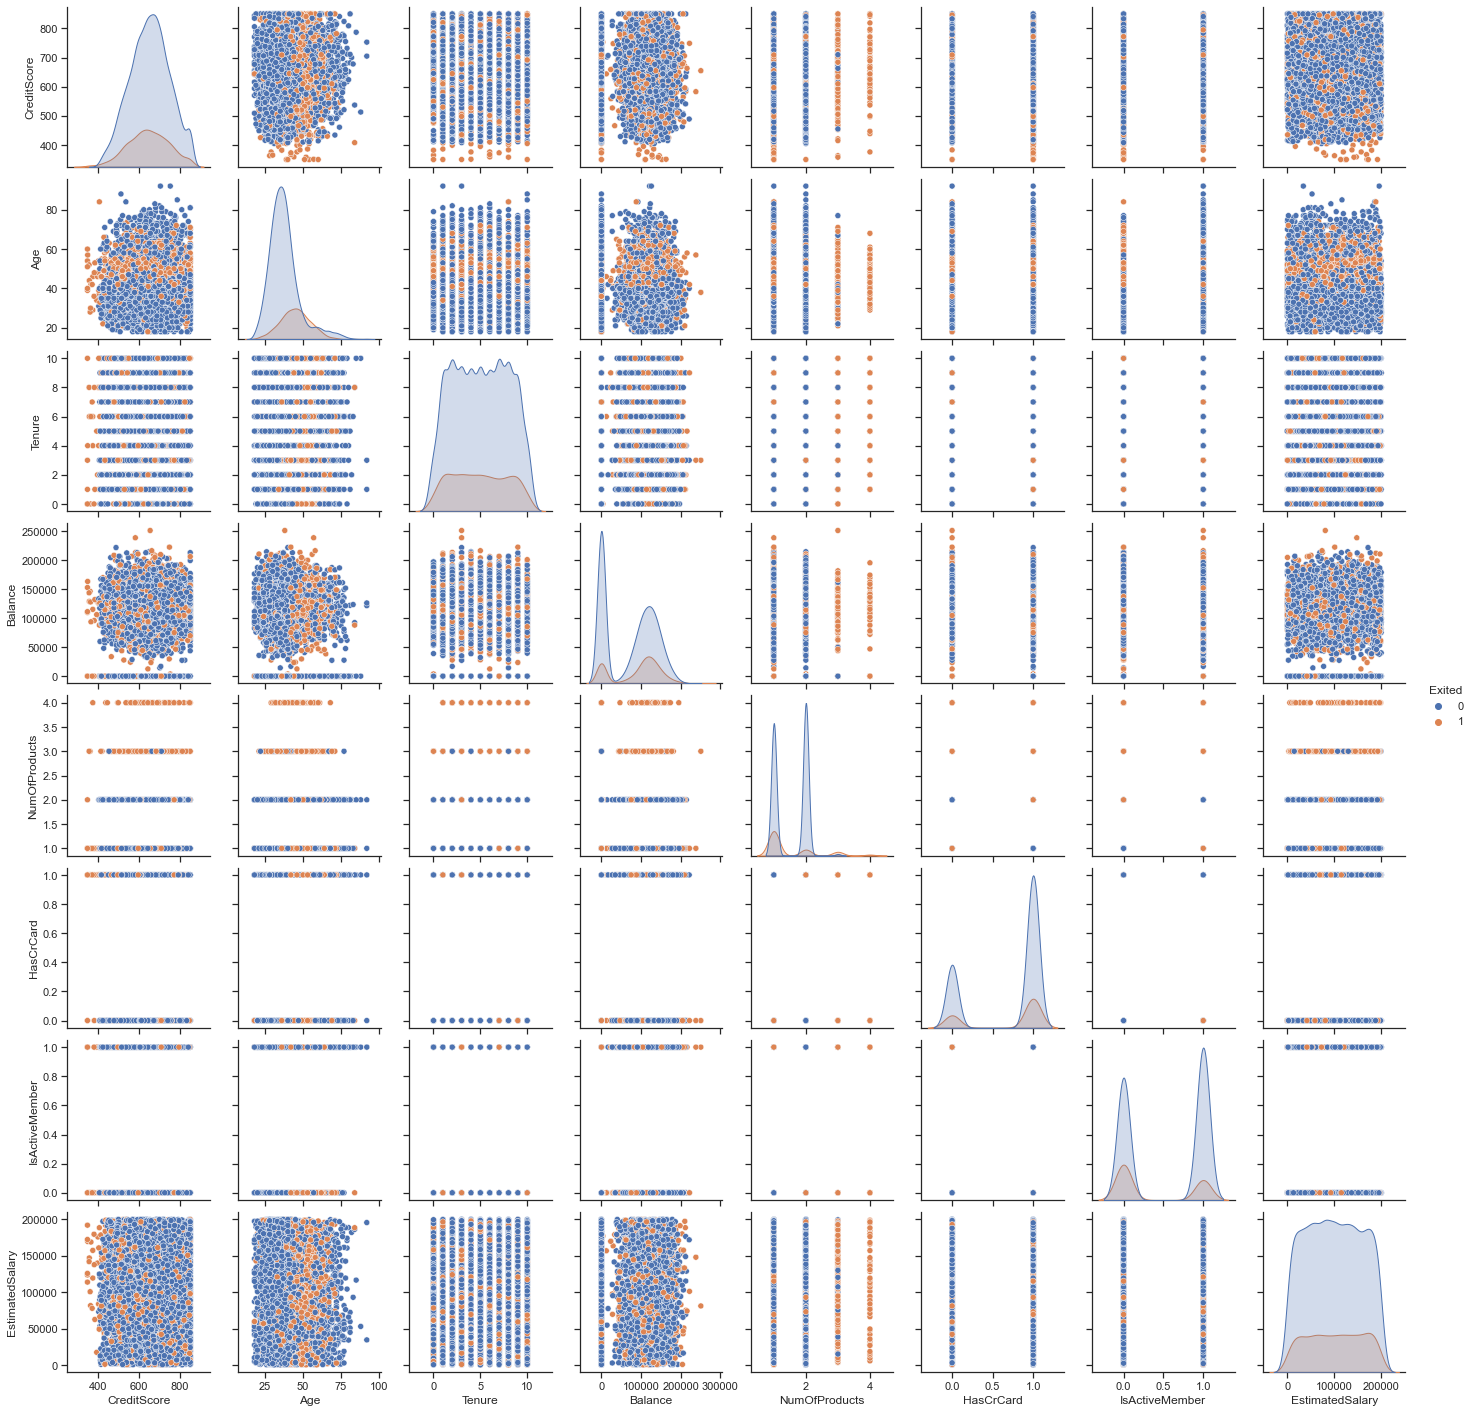

In [35]:
sns.set(style='ticks')
sns.pairplot(dataset, hue = 'Exited')

## 8.Encoder les variables ‘Geography’ & ‘Gender'

In [37]:
dataset = pd.get_dummies(dataset, columns=['Geography','Gender'],drop_first= True)

In [38]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


## 9.Définir les variables caractéristiques X et la variable cible y

In [40]:
X = dataset.iloc[:, :-8].values
y = dataset.iloc[:, 8].values

In [41]:
type(X)

numpy.ndarray

In [42]:
X[0:5,:]

array([[6.1900000e+02, 4.2000000e+01, 2.0000000e+00, 0.0000000e+00],
       [6.0800000e+02, 4.1000000e+01, 1.0000000e+00, 8.3807860e+04],
       [5.0200000e+02, 4.2000000e+01, 8.0000000e+00, 1.5966080e+05],
       [6.9900000e+02, 3.9000000e+01, 1.0000000e+00, 0.0000000e+00],
       [8.5000000e+02, 4.3000000e+01, 2.0000000e+00, 1.2551082e+05]])

In [43]:
y[0:5]

array([1, 0, 1, 0, 0], dtype=int64)

In [44]:
print('Dimension of X', X.shape)
print('Dimension of y', y.shape)

Dimension of X (10000, 4)
Dimension of y (10000,)


## 10. Diviser les données en données d’entraînement et de test

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 0)

In [48]:
print('Dimension of X_train', X_train.shape)
print('Dimension of y_train', y_train.shape)
print('Dimension of X_test', X_test.shape)
print('Dimension of y_test', y_test.shape)

Dimension of X_train (8000, 4)
Dimension of y_train (8000,)
Dimension of X_test (2000, 4)
Dimension of y_test (2000,)


## 11.Entraîner les modèles Logistic Regression, Decision Tree Classifier & k Nearest Neighbors

### Feature scaling

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()

In [51]:
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [52]:
X_train[0:5,:] 

array([[6.6700000e+02, 3.4000000e+01, 5.0000000e+00, 0.0000000e+00],
       [4.2700000e+02, 4.2000000e+01, 1.0000000e+00, 7.5681520e+04],
       [5.3500000e+02, 2.9000000e+01, 2.0000000e+00, 1.1236734e+05],
       [6.5400000e+02, 4.0000000e+01, 5.0000000e+00, 1.0568363e+05],
       [8.5000000e+02, 5.7000000e+01, 8.0000000e+00, 1.2677630e+05]])

In [53]:
X_train_sc[0:5,:]

array([[ 0.16958176, -0.46460796,  0.00666099, -1.21571749],
       [-2.30455945,  0.30102557, -1.37744033, -0.00631193],
       [-1.19119591, -0.94312892, -1.031415  ,  0.57993469],
       [ 0.03556578,  0.10961719,  0.00666099,  0.47312769],
       [ 2.05611444,  1.73658844,  1.04473698,  0.8101927 ]])

In [54]:
customer_0_sc = X_train_sc[0,:]

In [55]:
customer_0_sc

array([ 0.16958176, -0.46460796,  0.00666099, -1.21571749])

In [56]:
scaler.inverse_transform(customer_0_sc)

array([667.,  34.,   5.,   0.])

## les modèles Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
lr = LogisticRegression()
lr.fit(X_train_sc,y_train)

LogisticRegression()

In [59]:
y_pred = lr.predict(X_test_sc)

In [60]:
X_test_sc[0:10,:]

array([[-0.55204276, -0.36890377,  1.04473698,  0.8793029 ],
       [-1.31490297,  0.10961719, -1.031415  ,  0.42972196],
       [ 0.57162971,  0.30102557,  1.04473698,  0.30858264],
       [ 1.41696129, -0.65601634, -0.33936434,  0.57533623],
       [ 0.57162971, -0.08179119,  0.00666099,  1.38961097],
       [ 0.20050853,  1.73658844, -0.68538967,  1.5900207 ],
       [-0.62420521, -0.46460796, -1.72346566, -0.1640232 ],
       [-0.14999481, -0.94312892,  0.35268632,  1.30238547],
       [-0.54173384,  2.40651778,  1.39076231, -1.21571749],
       [-2.00560072,  2.31081359, -1.37744033,  1.42661775]])

In [61]:
X_test[0:10,:]

array([[5.9700000e+02, 3.5000000e+01, 8.0000000e+00, 1.3110104e+05],
       [5.2300000e+02, 4.0000000e+01, 2.0000000e+00, 1.0296741e+05],
       [7.0600000e+02, 4.2000000e+01, 8.0000000e+00, 9.5386820e+04],
       [7.8800000e+02, 3.2000000e+01, 4.0000000e+00, 1.1207958e+05],
       [7.0600000e+02, 3.8000000e+01, 5.0000000e+00, 1.6303482e+05],
       [6.7000000e+02, 5.7000000e+01, 3.0000000e+00, 1.7557595e+05],
       [5.9000000e+02, 3.4000000e+01, 0.0000000e+00, 6.5812350e+04],
       [6.3600000e+02, 2.9000000e+01, 6.0000000e+00, 1.5757647e+05],
       [5.9800000e+02, 6.4000000e+01, 9.0000000e+00, 0.0000000e+00],
       [4.5600000e+02, 6.3000000e+01, 1.0000000e+00, 1.6535061e+05]])

In [62]:
for i in range(10):
    print((y_test[i], y_pred[i]))

(0, 0)
(1, 0)
(0, 0)
(0, 0)
(0, 0)
(1, 1)
(0, 0)
(0, 0)
(1, 0)
(1, 1)


## Decision Tree Classifier

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
dt = DecisionTreeClassifier()

In [76]:
dt.fit(X_train_sc,y_train)

DecisionTreeClassifier()

In [77]:
y_pred_dt = dt.predict(X_test_sc)

In [78]:
for i in range(20):
    print([y_test[i],y_pred_dt[i]])

[0, 0]
[1, 0]
[0, 1]
[0, 0]
[0, 1]
[1, 0]
[0, 0]
[0, 0]
[1, 0]
[1, 0]
[0, 0]
[0, 0]
[0, 0]
[0, 0]
[1, 1]
[1, 0]
[0, 0]
[0, 1]
[0, 1]
[0, 0]


## K Nearest Neighbors

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [70]:
knn.fit(X_train_sc,y_train)

KNeighborsClassifier()

In [71]:
y_pred_knn = knn.predict(X_test_sc)

In [72]:
X_test[0:20,:]

array([[5.9700000e+02, 3.5000000e+01, 8.0000000e+00, 1.3110104e+05],
       [5.2300000e+02, 4.0000000e+01, 2.0000000e+00, 1.0296741e+05],
       [7.0600000e+02, 4.2000000e+01, 8.0000000e+00, 9.5386820e+04],
       [7.8800000e+02, 3.2000000e+01, 4.0000000e+00, 1.1207958e+05],
       [7.0600000e+02, 3.8000000e+01, 5.0000000e+00, 1.6303482e+05],
       [6.7000000e+02, 5.7000000e+01, 3.0000000e+00, 1.7557595e+05],
       [5.9000000e+02, 3.4000000e+01, 0.0000000e+00, 6.5812350e+04],
       [6.3600000e+02, 2.9000000e+01, 6.0000000e+00, 1.5757647e+05],
       [5.9800000e+02, 6.4000000e+01, 9.0000000e+00, 0.0000000e+00],
       [4.5600000e+02, 6.3000000e+01, 1.0000000e+00, 1.6535061e+05],
       [4.9800000e+02, 3.1000000e+01, 1.0000000e+01, 0.0000000e+00],
       [7.1400000e+02, 4.5000000e+01, 8.0000000e+00, 1.5090029e+05],
       [4.8800000e+02, 3.3000000e+01, 4.0000000e+00, 1.4000235e+05],
       [5.6200000e+02, 3.1000000e+01, 9.0000000e+00, 1.1715300e+05],
       [7.7200000e+02, 5.1000000e+

In [73]:
for i in range(20):
    print((y_test[i],y_pred_knn[i]))

(0, 0)
(1, 0)
(0, 0)
(0, 0)
(0, 0)
(1, 0)
(0, 0)
(0, 0)
(1, 0)
(1, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(1, 0)
(1, 1)
(0, 0)
(0, 1)
(0, 0)
(0, 0)


## 12. Calculer les confusion matrix, accuracy score, precision score et recall score

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [64]:
print('Confusion matrix :')
print(confusion_matrix(y_test,y_pred))

Confusion matrix :
[[1528   67]
 [ 377   28]]


In [65]:
print('Accuracy score {:.4f}'.format(accuracy_score(y_test,y_pred)))

Accuracy score 0.7780


In [66]:
from sklearn.metrics import precision_score, recall_score

In [67]:
print('Precision score {:.4f}'.format(precision_score(y_test,y_pred)))
print('Recall score {:.4f}'.format(recall_score(y_test,y_pred)))

Precision score 0.2947
Recall score 0.0691


## 13. Présenter l’architecture de l’arbre 

In [79]:
!pip install graphviz

In [80]:
import graphviz
from sklearn import tree
from sklearn.tree import export_graphviz

In [83]:
data_features_names = ['Age', 'CreditScore','Tenure','Balance']
model = DecisionTreeClassifier(max_depth=4)
model.fit(X,y)

DecisionTreeClassifier(max_depth=4)

In [84]:
tree.export_graphviz(model,
    out_file='dt_churn.dot',
    feature_names=data_features_names,
    label='all',
    filled=True,
    rounded=True)

In [87]:
from IPython.display import Image

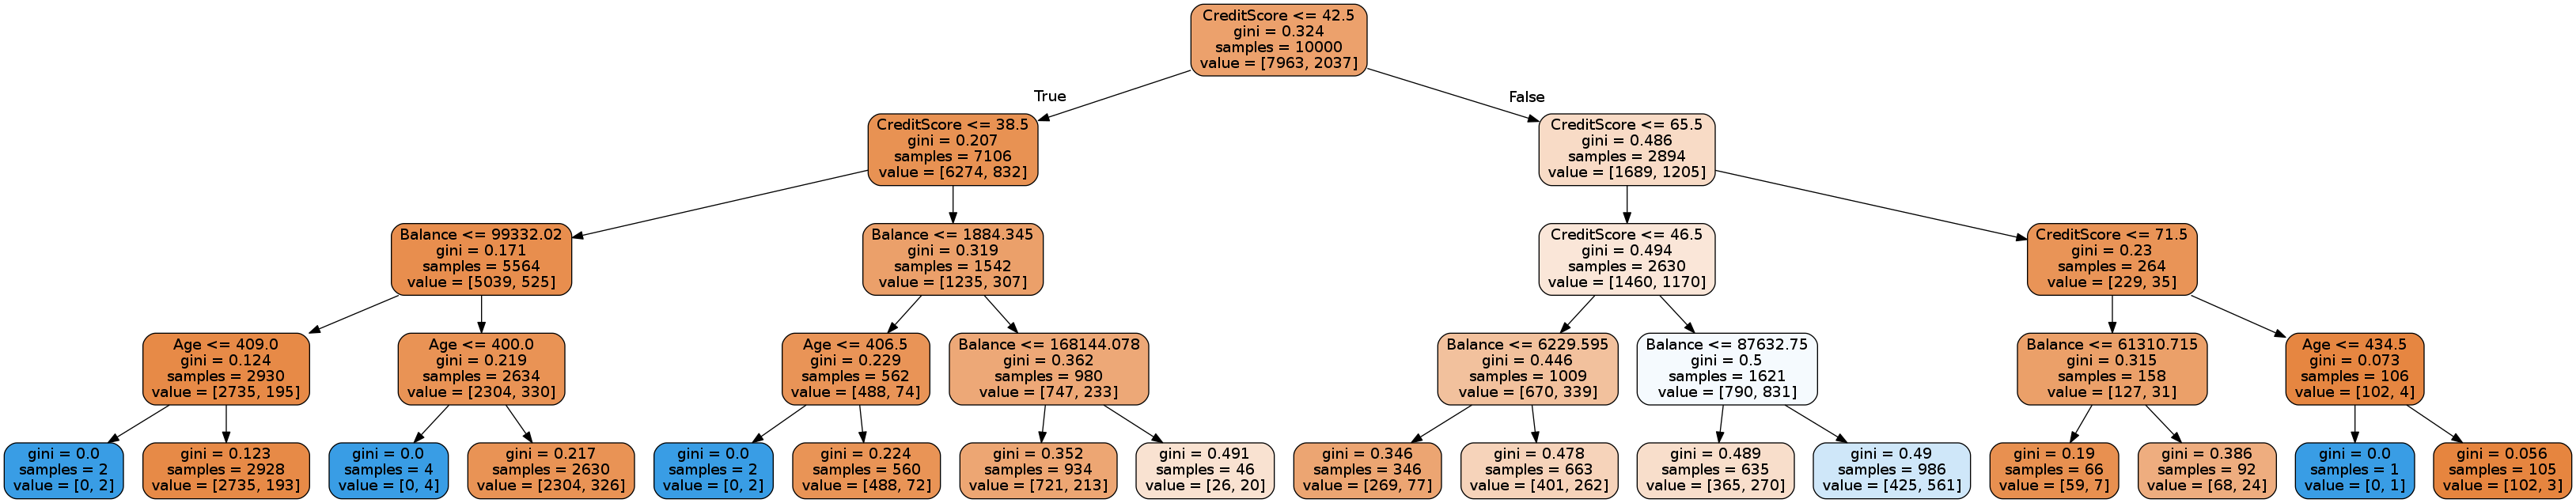

In [97]:
Image('dt_churn.png')

## 14. Entraîner le modèle Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier()

## 15. Utiliser Random Forest pour trouver les variables les plus importantes

In [95]:
importances = clf.feature_importances_ 

In [96]:
importances

array([0.34838869, 0.27397353, 0.12768257, 0.24995521])